In [18]:
import torch.nn as nn
import torch
import skimage.data as skdata
import matplotlib.pyplot as plt
from einops import rearrange, repeat

(512, 512, 3) uint8 <class 'numpy.ndarray'>


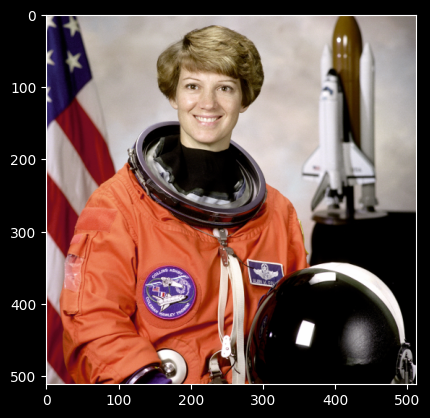

In [12]:
img_src = skdata.astronaut()
print(img_src.shape, img_src.dtype, type(img_src))
plt.imshow(img_src)
plt.show()

In [24]:
unfold = nn.Unfold(kernel_size=(2,3))
input_tensor = torch.randn(2, 5, 3, 4) # N C SD (3,4 is the spatial dimension)
output_tensor = unfold(input_tensor)
output_tensor.shape # (2, 30, 4), (N, C*2*3,)

torch.Size([2, 30, 4])

In [30]:
img_tensor = torch.tensor(img_src).to(torch.float32)
img_tensor = repeat(img_tensor, 'h w c -> b c h w', b = 4)
unfold = nn.Unfold(kernel_size=(3, 3), padding=(2,2))
img_output = unfold(img_tensor)
img_output.shape

torch.Size([4, 27, 264196])

In [27]:
img_tensor.dtype

torch.uint8

## nn.Fold(output_size, kernel_size, dilation=1, padding=0, stride=1)
combine patches of images, of shape $(N, C \times \prod(kernel\_size), L)$, where  
$N$ is batch dimension, $L$ is the total number of blocks.
output tensor shape is $(N, C, output\_size[0], output\_size[1])$
$$
L = \prod_d \lfloor \frac{output\_size[d]+2\times padding[d] - dilation[d]\times (kernel\_size[d] - 1) -1}{stride[d]} + 1 \rfloor
$$ 

In [3]:
fold = nn.Fold(output_size=(4,5), kernel_size=(2,2))

In [4]:
input_tensor = torch.randn(1, 3 * 2 * 2, 12)
output_tensor = fold(input_tensor)
output_tensor.shape

torch.Size([1, 3, 4, 5])